In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
x_list = [1.3,1.6,1.9]
y_list = [0.6200860,0.4554022,0.2818186]
dydx_list = [-0.5220232,-0.5698959,-0.5811571]

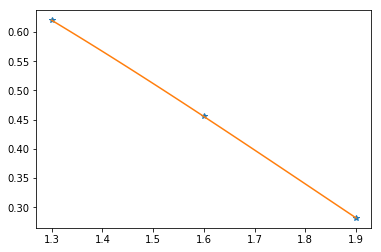

In [56]:

Q = np.zeros((2*len(x_list),2*len(x_list)))
Z = np.zeros(2*len(x_list))

for i in range(0,len(x_list)):
    Z[2*i]      = x_list[i]
    Z[2*i+1]    = x_list[i]
    Q[2*i][0]   = y_list[i]
    Q[2*i+1][0] = y_list[i]
    Q[2*i+1][1] = dydx_list[i]
    if i!=0:
        Q[2*i][1] = (Q[2*i][0]-Q[2*i-1][0]) / (Z[2*i]-Z[2*i-1])
        
for i in range(2,len(Z)):
    for j in range(2,i+1):
        Q[i][j] = (Q[i][j-1]-Q[i-1][j-1]) / (Z[i]-Z[i-j])



def PolyHermite(x):
    sum = 0
    for i in range(1,len(Z)):
        prod = 1.0
        for j in range(0,i):
            prod = prod*(x-Z[j])
        sum=sum+Q[i][i]*prod
    H = Q[0][0]+sum 
    return H
            

x_array=np.linspace(min(x_list),max(x_list),100)
y_array=[]

for i in range(0,len(x_array)):
    y_array.append(PolyHermite(x_array[i]))
    
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_array,y_array)

    